# A gentle introduction to graph theory.


## The basics
A graph $G$ consists of a paid $(V, E)$, where $V$ is a set of vertices and $E$ is a set of edges. Below is an example of a few graphs.

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

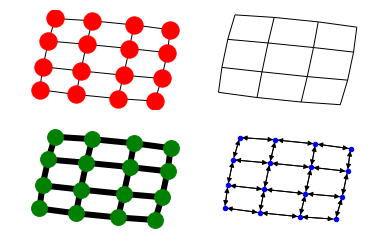

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.grid_2d_graph(4, 4)  # 4x4 grid

pos = nx.spring_layout(G, iterations=100)

plt.subplot(221)
nx.draw(G, pos, font_size=8)

plt.subplot(222)
nx.draw(G, pos, node_color='k', node_size=0, with_labels=False)

plt.subplot(223)
nx.draw(G, pos, node_color='g', node_size=250, with_labels=False, width=6)

plt.subplot(224)
H = G.to_directed()
nx.draw(H, pos, node_color='b', node_size=20, with_labels=False)

plt.show()

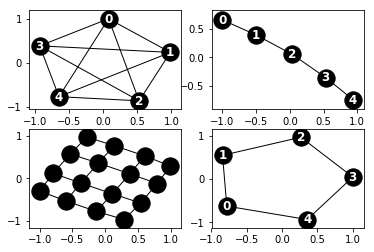

In [19]:
G = [nx.complete_graph(n=5), nx.path_graph(n=5), nx.grid_2d_graph(4, 4), nx.cycle_graph(n=5)]
plt.subplot(221)
nx.draw_networkx(G[0], node_color='black', font_color='w', font_weight='bold')

plt.subplot(222)
nx.draw_networkx(G[1], node_color='black', font_color='w', font_weight='bold')

plt.subplot(223)
nx.draw_networkx(G[2], node_color='black', font_color='w', font_weight='bold', with_labels=False)

plt.subplot(224)
nx.draw_networkx(G[3], node_color='black', font_color='w', font_weight='bold')

plt.show()



## A few basic definitions
- A ***complete graph*** is a simple-undirected graph in which every paid of distinct vertices is connected by a unique edge.
- A ***simple grapah*** is a graph with no loops or multiple edges.
- ***Defree of a vertex*** $v$, $d(v)$, is the number of times it appears as an endpoint of an edge.
- A ***path*** of length n is a graph with two nodes of degree 1 and the other n-2 nodes have a degree of 2.
- A ***cycle*** is a subset of the edge set of G that forms a path such that the first node of the path corresponds to the last. .

## Formal definitions
***Complete Graph***.
$K_n$ is a complete graph on $v_1, v_2, \cdots, v_n$ in which every two distinct vertices are joined by an edge.

A ***path*** is a graph $P_n$, on vertices $v_1, v_2, \cdots, v_n$, with edged ${v_i, v_{i+1}}$ for $ 1 \leq i \leq n$, and no other edges.

A **cycle** is a graph $C_n$ on vertices $v_1, v_2, \cdots, v_n$ with edges ${v_i, v_{1 +(i\ mod\ n)}}$ for $1 \leq i \ leq n$, and no other edges.

**Exercise**
- How many edges does complete graph with $n$ nodes have? Print degree of each node.
- Calculate degree of each ode for the complete graph. Print degree of each node.
- Draw a path with length of 10. Add an edge to make the path a cycle. Print degree of each node.

In [35]:
import networkx as nx

degree view: [(0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)],
Number of edges:15


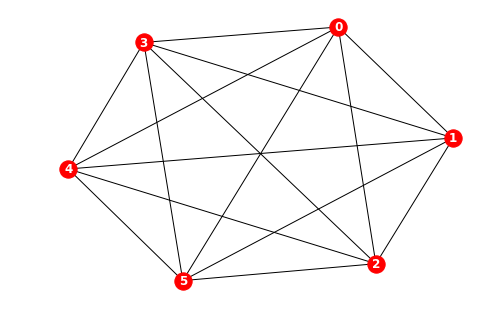

In [191]:
CG = nx.complete_graph(6)
nx.draw(CG, with_labels=True, font_color='w', font_weight='bold')
print("degree view: {},\nNumber of edges:{}".format(CG.degree(),CG.number_of_edges()))

degree view: [(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 1)],
Number of edges:15


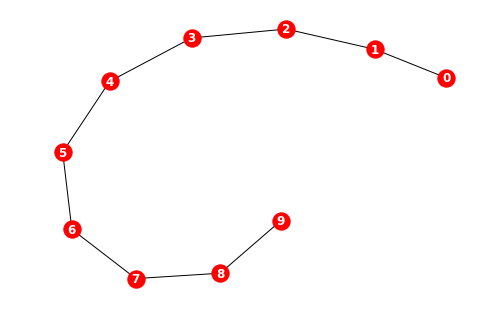

In [190]:
PG = nx.path_graph(10)
print("degree view: {},\nNumber of edges:{}".format(PG.degree(),CG.number_of_edges()))
nx.draw(PG, with_labels=1, font_color='w', font_weight='bold')

degree view: [(0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)],
Number of edges:15


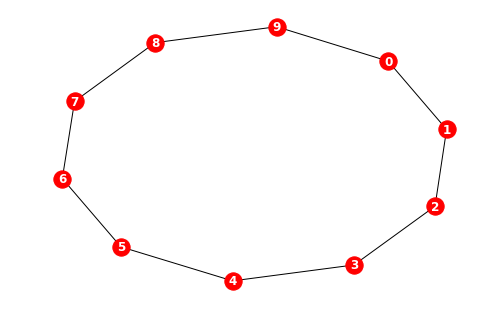

In [189]:
PG.add_edge(9,0)
print("degree view: {},\nNumber of edges:{}".format(CG.degree(),CG.number_of_edges()))
nx.draw(PG, with_labels=True, font_color='w', font_weight='bold')

- A ***bipartite*** graph is a graph that can be split into two sets of nodes with no edges between the nodes in each set. More formally A graph $G$ is ***bipartite*** if its vertices can be partitioned into two parts, say ${v_1, v_2, \cdots, v+n}$ and ${w_1, w_2, \ctods, w_n}$ so that all edges join some $v_i$ to some $w_j$; no two vertices $v_i$ and $v_j$ are adjacent. 

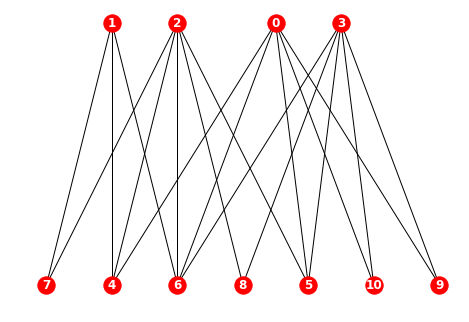

In [141]:
from networkx.drawing.nx_agraph import graphviz_layout
BPG = nx.bipartite.random_graph(4,7, .60)
BPG.edges()
pos = pos = graphviz_layout(BPG, prog='dot')
nx.draw(BPG, pos=pos, with_labels=True, font_color='w', font_weight='bold')

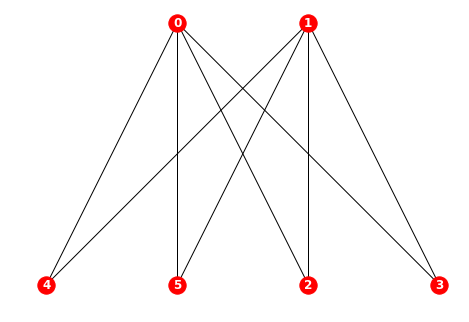

In [144]:
BPG = nx.bipartite.complete_bipartite_graph(2,4)
nx.draw(BPG, pos=graphviz_layout(BPG, prog='dot'), with_labels=True, font_color='w', font_weight='bold')

In [146]:
BPG.remove_edges_from([(0,2), (0,3), (0,4), (0,5)])

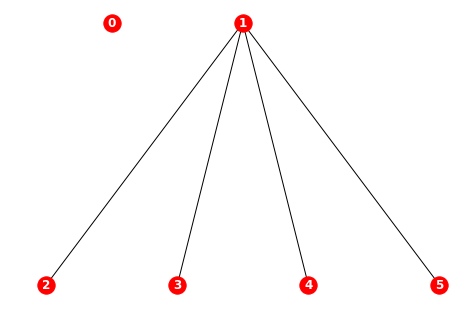

In [147]:
nx.draw(BPG, pos=graphviz_layout(BPG, prog='dot'), with_labels=True, font_color='w', font_weight='bold')

In [148]:
Is this still a bipartite graph?

Object `graph` not found.


In [ ]:
Is this still a bipartite graph

In [149]:
(nx.bipartite.is_bipartite(CBPG))

False

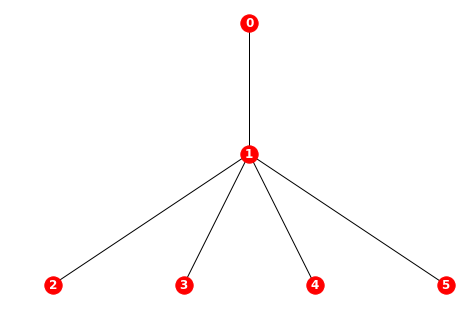

In [151]:
BPG.add_edges_from([(0,1)])
nx.draw(BPG, pos=graphviz_layout(BPG, prog='dot'), with_labels=True, font_color='w', font_weight='bold')

How about this one?

In [153]:
(nx.bipartite.is_bipartite(BPG))

True

and what are the sets on each side?

In [154]:
nx.bipartite.basic.sets(BPG)

({0, 2, 3, 4, 5}, {1})

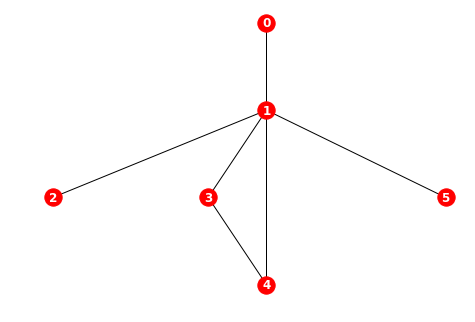

In [136]:
CBPG.add_edges_from([(3,4)])
nx.draw(CBPG, pos=graphviz_layout(CBPG, prog='dot'), with_labels=True, font_color='w', font_weight='bold')

In [137]:
(nx.bipartite.is_bipartite(CBPG))

False

# Graph Isomorphism
Two graphs which contain the same number of vertices connected in a similar way are isomorphic. 

In [165]:
G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (1, 3), (2,3)])
H = nx.Graph()
H.add_edges_from([(1,2), (2,3), (2, 0), (0,3)])

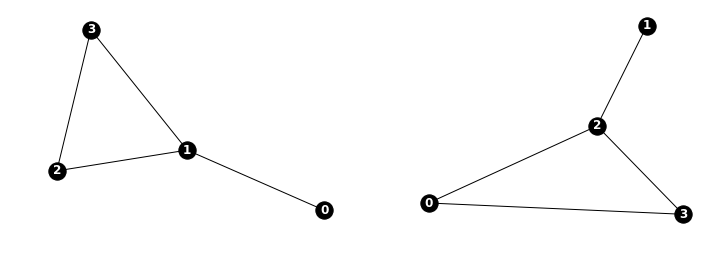

In [183]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

nx.draw_networkx(G, node_color='black', font_color='w', font_weight='bold', ax=axs[0])
axs[0].set_axis_off()

nx.draw_networkx(H, node_color='black', font_color='w', font_weight='bold', ax=axs[1])
axs[1].set_axis_off()

plt.show()

Are these two graphs isomorphic?

In [160]:
nx.algorithms.is_isomorphic(G, H)

True

## Isomorphism: Formal definition
Suppose $G_1=(V,E)$ and $G_1=(W,F)$. $G_1$ and $G_2$ are **isomorphic** if there is a bijection $f:V \rightarrow W$ such that $\{v_1, v_2\}\in E \iff \{f(v_1), f(v_2)\}\in F$. When $G_1$ and $G_2$ are isomorphic, we write $G_1 \cong G_2$.
In the above example function $f$ is a rotation:
$$
f(0) = 1\\
f(1) = 2\\
f(2) = 3\\
f(3) = 0\\
\text{or more generally: }f(v_i)=v_{i+1}
$$

In [192]:
print("degree view of G: {}\ndegree view of G: {}".format(G.degree(), H.degree()))

degree view of G: [(0, 1), (1, 3), (2, 2), (3, 2)]
degree view of G: [(1, 1), (2, 3), (3, 2), (0, 2)]


As it can be seen, the degree sequence of the isomorphic graphs is the same. More intuitively, isomorphism is re-arrangement of nodes without changing the arrangement of a graph.

# Neighborhood
In the most standard case, if two vertice are connected, we say the vertices are **adjacent**. The set of vertices that are adjacent to a node $v$ is called the **open neighborhood** of $v$, or just **neighborhood** for short. A closed neighborhood of node $v$, is its open neighborhood plus the node itself or more formally, $\mathcal{N}[v]=\mathcal{N}(v) \cup \{v\}$.


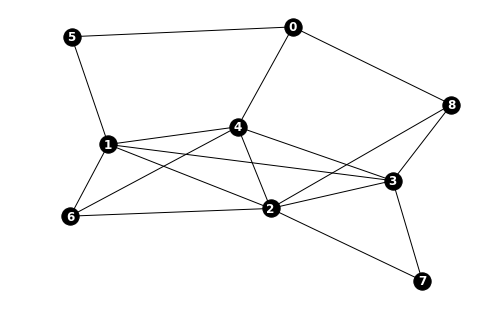

In [224]:
import random
sequence = [1, 2, 2, 3, 4]
G1 = nx.random_degree_sequence_graph(sequence, seed=42)
sequence = [2,3,4,2,1,2, 3, 2, 3]
G2 = nx.random_degree_sequence_graph(sequence, seed=42)
F = nx.compose(G1, G2)
nx.draw_kamada_kawai(F, with_labels=True, font_color='w', font_weight='bold', node_color='black')

In [232]:
(list(F.neighbors(4)))

([0, 1, 2, 3, 6], matrix([[0, 1],
         [1, 0]], dtype=int64))

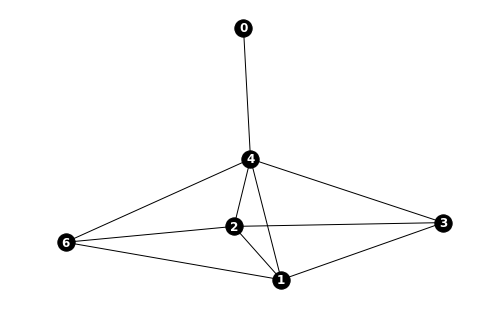

In [273]:
nx.draw(nx.ego_graph(F, 4), with_labels=True, font_color='w', font_weight='bold', node_color='black')

This definition can be expanded to include adjacency defined based on different criteria to capture deeper structures in a graph. For instance a neighborhood of node $v$ with distance 2 is a neighborhood that includes nodes that are of distance 2 of node $v$.

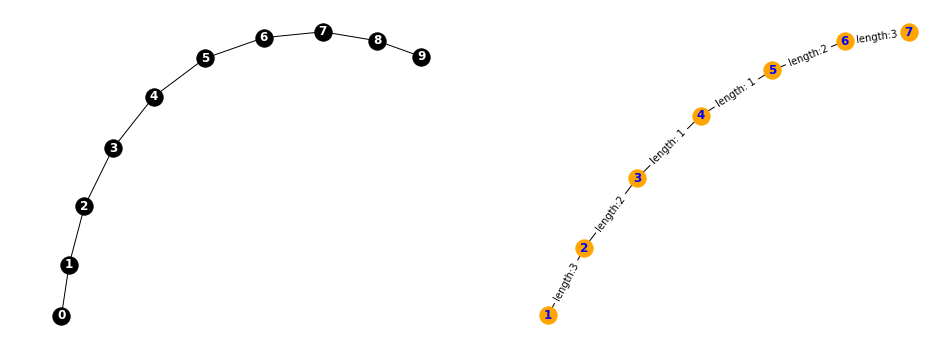

In [270]:
K = nx.path_graph(10)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
nx.draw(K, pos=nx.spring_layout(K), with_labels=True, font_color='w', font_weight='bold', node_color='black', ax=axs[0])
axs[0].set_axis_off()

N4_3 = nx.ego_graph(K, 4, radius=3)
edge_lables = {(4,3): 'length: 1', (3,2):'length:2', (2,1):'length:3', 
               (4,5): 'length: 1', (5,6):'length:2', (6,7):'length:3'}
pos = nx.spring_layout(N4_3)
nx.draw_networkx(N4_3, pos=pos, font_color='b', font_weight='bold', node_color='orange', ax=axs[1])
nx.draw_networkx_edge_labels(N4_3, pos=pos, edge_labels=edge_lables, ax=axs[1])
axs[1].set_axis_off()

plt.show()

# Adjacency Matrix
Adjacency matrix is a matrix whose rows and columns represent nodes of a graph. If there is an edge connecting the modes, then the value of the cell is 1, otherwise, the value is 0.
More formally, 

Graph $\mathcal{G}=(V,E)$ is an undirected graph $\mathcal{G}=(V,E)$. The adjacency matrix of a $\mathcal{G}$ is given by:
$$
A_{\mathcal{G}}(i,j) = 
\begin{cases}
  1  & \text{if (i,j)} \in E,\\    
  0 & otherwise    
\end{cases}
$$

Adjacency matrix is a sparse matrix as most nodes in large graphs might not be connected.

(EdgeView([(0, 4), (0, 8), (0, 5), (1, 3), (1, 4), (1, 5), (1, 2), (1, 6), (2, 4), (2, 3), (2, 6), (2, 7), (2, 8), (3, 4), (3, 8), (3, 7), (4, 6), (8, 8)]),
 matrix([[0, 0, 0, 0, 1, 1, 0, 0, 1],
         [0, 0, 1, 1, 1, 1, 1, 0, 0],
         [0, 1, 0, 1, 1, 0, 1, 1, 1],
         [0, 1, 1, 0, 1, 0, 0, 1, 1],
         [1, 1, 1, 1, 0, 0, 1, 0, 0],
         [1, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 1, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 0, 0, 0, 0, 0],
         [1, 0, 1, 1, 0, 0, 0, 0, 1]], dtype=int64))

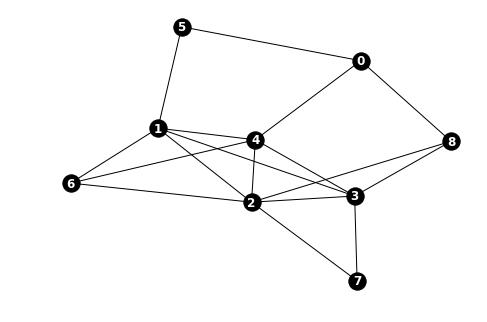

In [282]:
nx.draw(F, with_labels=True, font_color='w', font_weight='bold', node_color='black')
F.add_edge(8, 8)
A = nx.adj_matrix(F).todense()
(F.edges(), A)

matrix([[0., 0., 1., 0., 1.],
        [0., 0., 1., 1., 0.],
        [1., 1., 0., 1., 0.],
        [0., 1., 1., 0., 0.],
        [1., 0., 0., 0., 1.]])

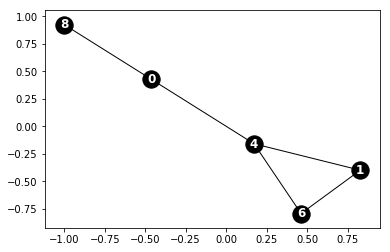

In [299]:
nbunch = [0, 1, 4, 6, 8]
A1 = nx.to_numpy_matrix(F, nodelist=nbunch)
nx.draw_networkx(nx.subgraph(F, nbunch=nbunch), font_color='w', font_weight='bold', node_color='black')
A1

# Weighted graphs
Exoplanets are hat are outside of our solar system. Up until recently we  had not observed any planet outside of the solar systems, simply because planets do not emit enough light to be observable by telescopes. according to Newton's Law of Universal Gravitation, Objects with mass feel an attractive force that is proportional to their masses and inversely proportional to the square of the distance, or $$F=G\frac{Mm}{r^2}$$.
So, if a star affects orbit of a planet that revolves around the star, the planet also does affect orbit of its star slightly. Add to that that there are potentially several planets in a solar system, , then planetary gravity does influences orbits of planets and starts in solar system. Those little wobbles, resulted by smaller mass of planets, was used to discover the first exoplanets. This is in short a multi-body system. In a simplified model of a solar system, the orbits of the planets and the stars are dependent mass of the objects and distance to the star. HEre we are ignoring the effects that the planets have on one another and assume that there is only one start in the system. This can be modeled using a graph data structure. For instance, our solar system data can be summarized as:

In [396]:
SSDF = pd.read_csv('data/scaless_distance.csv')
SSDF

,Mercury,Venus,Earth,Mars,Jupyter,Saturn,Uranus,Neptune
Mercury,0.00,0.34,0.61,1.14,4.84,18.82,18.82,29.70
Venus,0.34,0.00,0.28,0.80,4.48,8.80,18.49,29.37
Earth,0.61,0.28,0.00,0.52,4.20,8.52,18.21,29.09
Mars,1.14,0.80,0.52,0.00,3.68,7.99,17.69,28.56
Jupyter,4.84,4.48,4.20,3.68,0.00,4.32,14.01,24.89
Saturn,18.82,8.80,8.52,7.99,4.32,0.00,9.70,20.57
Uranus,18.82,18.49,18.21,17.69,14.01,9.70,0.00,10.88
Neptune,29.70,29.37,29.09,28.56,24.89,20.57,10.88,0.00


In [397]:
mass = {0: {'mass': 0.166}, 
        1: {'mass': 2.447}, 
        2: {'mass': 3.040}, 
        3: {'mass': 0.323}, 
        4: {'mass': 954.791}, 
        5: {'mass': 285.886}, 
        6: {'mass': 43.662}, 
        7: {'mass': 51.514}}
SSG = nx.from_numpy_matrix(SSDF.values)
nx.set_node_attributes(SSG, mass)
mapping = {0: 'Mercury', 1: 'Venus', 2:'Earth', 3:'Mars', 4:'Jupyter', 5:'Saturn', 6:'Uranus', 7:'Neptune'}
SSG = nx.relabel_nodes(SSG, mapping)

[('Mercury', 0.166), ('Venus', 2.447), ('Earth', 3.04), ('Mars', 0.323), ('Jupyter', 954.791), ('Saturn', 285.886), ('Uranus', 43.662), ('Neptune', 51.514)]


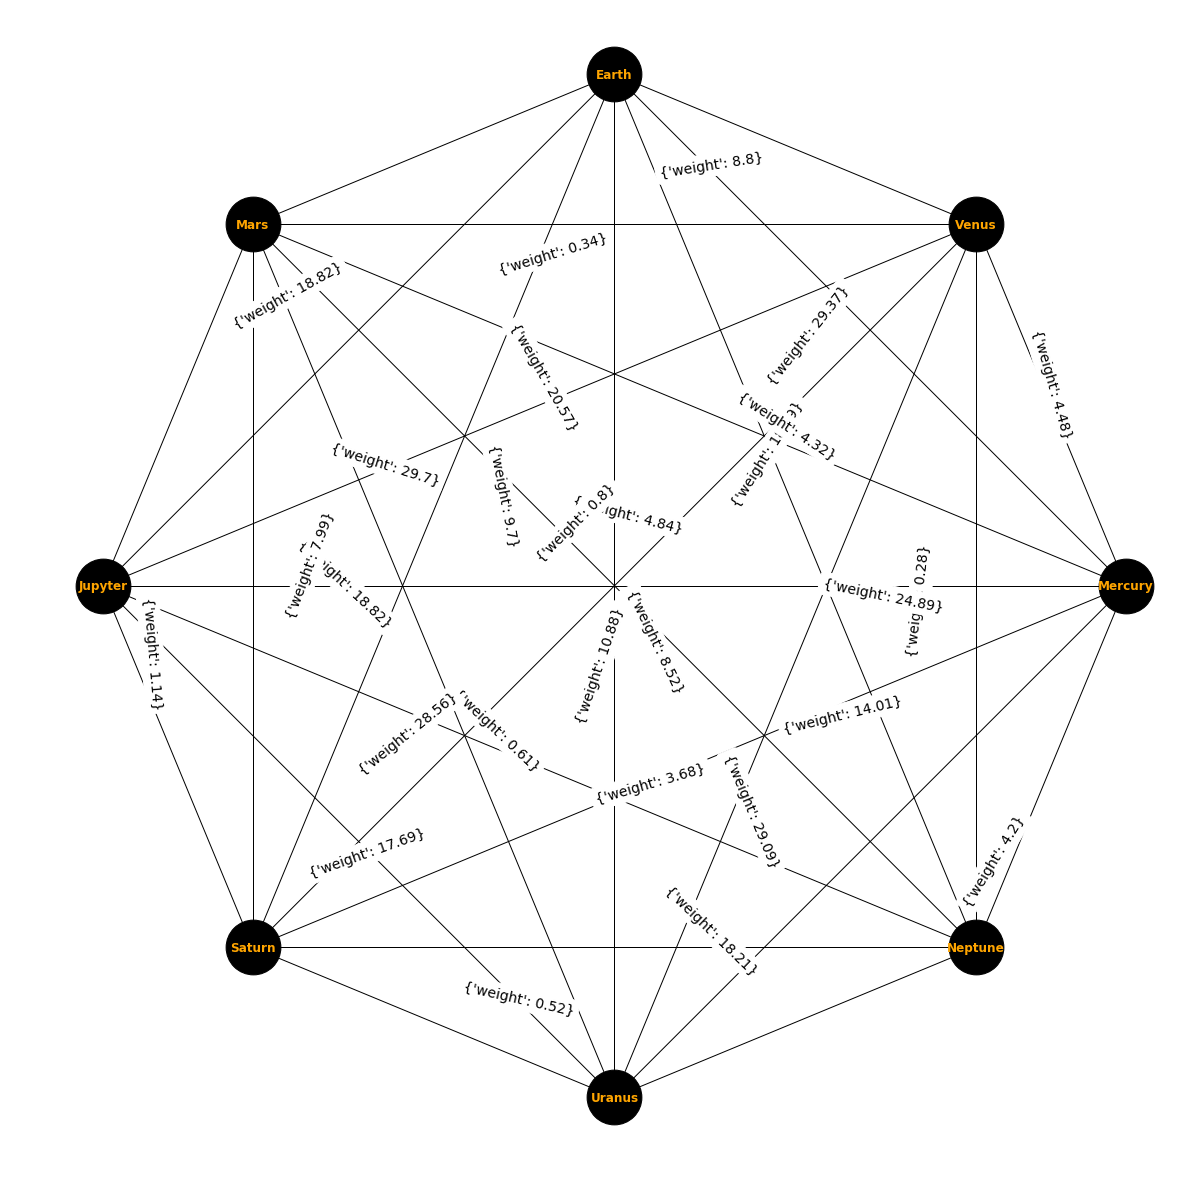

In [404]:
print(SSG.nodes(data='mass'))
plt.figure(3,figsize=(16,16))
nx.draw_circular(SSG, 
                 with_labels=True,
                 node_size = 3000, font_weight='bold', font_color='orange', node_color='black')
nx.draw_networkx_edge_labels(SSG, pos=nx.spring_layout(SSG), font_size=14)
plt.show()

Here the edges are given a weight. the weight is, in fact, distance between each pair of planets in the Solar System. We can use the weights in order to calculate a weighted propagation. In the Newtonian gravity, distance has a huge impact on gravitational pull. During the propagation phase of reading a graph, these distances will help us create a more effective adjacency matrix.

## Adjacency Matrix for a Weighted Graph
Weighted graph $\mathcal{G}=(V,E,w)$ is an undirected graph $\mathcal{G}=(V,E)$ along with a function $w:E\rightarrow \mathbb{R}^+$. The adjacency matrix of a $\mathcal{G}$ is given by:
$$
A_{\mathcal{G}}(i,j) = 
\begin{cases}
  w(i,j)  & \text{if (i,j)} \in E,\\    
  0 & otherwise    
\end{cases}
$$